<a href="https://colab.research.google.com/github/HatimJhalodwala/CleanTech/blob/main/Cleantech_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Assignment_Dataset.xlsx')

In [3]:
df.head(5)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [4]:
# Convert the date column to a datetime object
df["Date"] = pd.to_datetime(df["Date"])

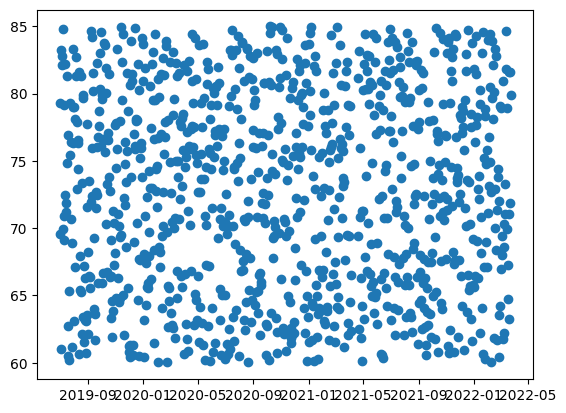

In [5]:
x = np.array(df['Date'])
y = np.array(df['PR'])

plt.scatter(x,y)
plt.show()

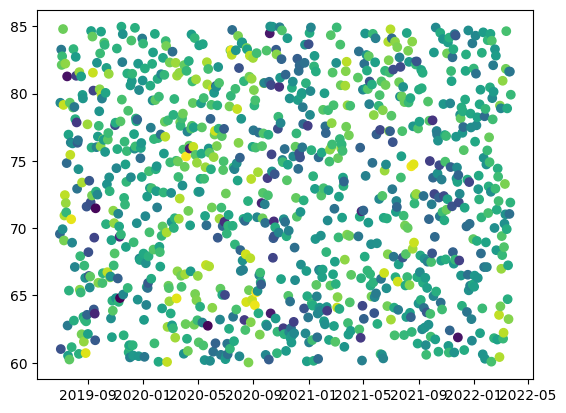

In [6]:
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis')
plt.show()

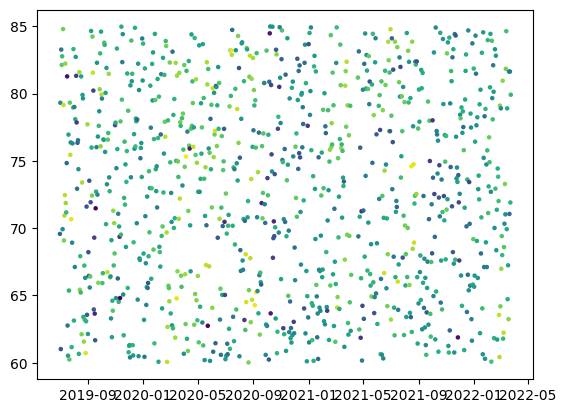

In [7]:
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)
plt.show()

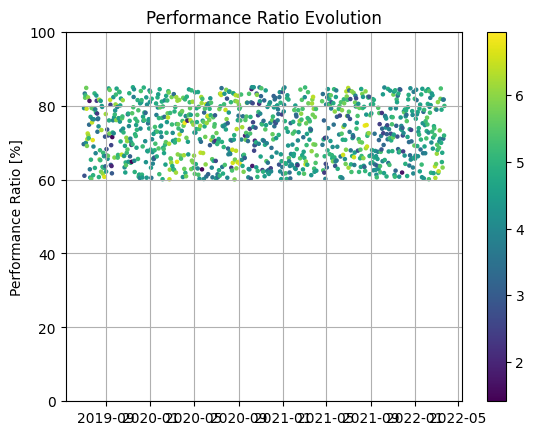

In [8]:
ax = plt.axes()
ax.set_title("Performance Ratio Evolution")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

plt.grid()
plt.colorbar()
plt.show()

In [ ]:
## plt.figure(figsize=(10, 5))  REDUNDANT

In [9]:
PR_average = df['PR'].rolling(window=7).mean()

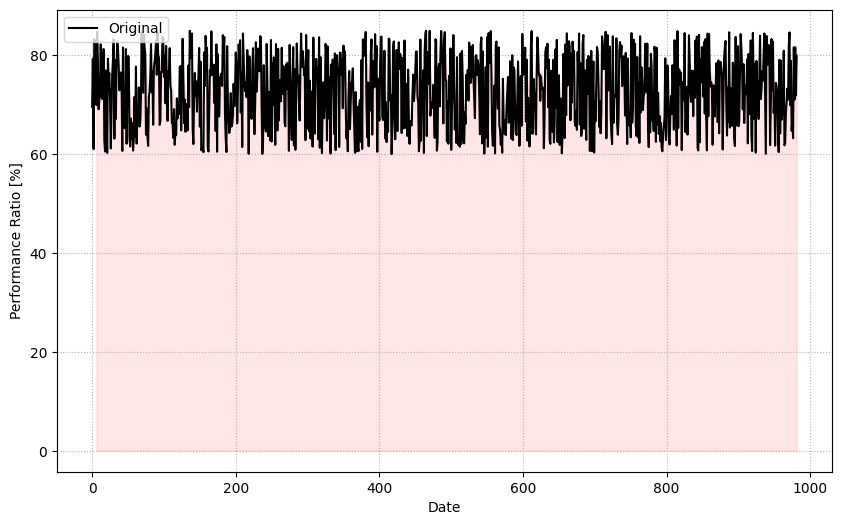

In [10]:
plt.plot(df['PR'], 'k-', label='Original')

plt.ylabel('Performance Ratio [%]')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(PR_average.index, 0, PR_average, color='r', alpha=0.1)
plt.legend(loc='upper left')
plt.show()

In [11]:
PR_data = df.set_index('Date')
PR_data['SMA_30_days'] = PR_data.iloc[:,0].rolling(window=30).mean()
PR_data.head(5)

,GHI,PR,SMA_30_days
Date,,,
2019-07-01,3.256608,69.575676,NaN
2019-07-02,3.976767,79.314411,NaN
2019-07-03,2.811867,61.020006,NaN
2019-07-04,3.658408,83.262576,NaN
2019-07-05,5.590683,82.124440,NaN


Text(0, 0.5, 'PR')

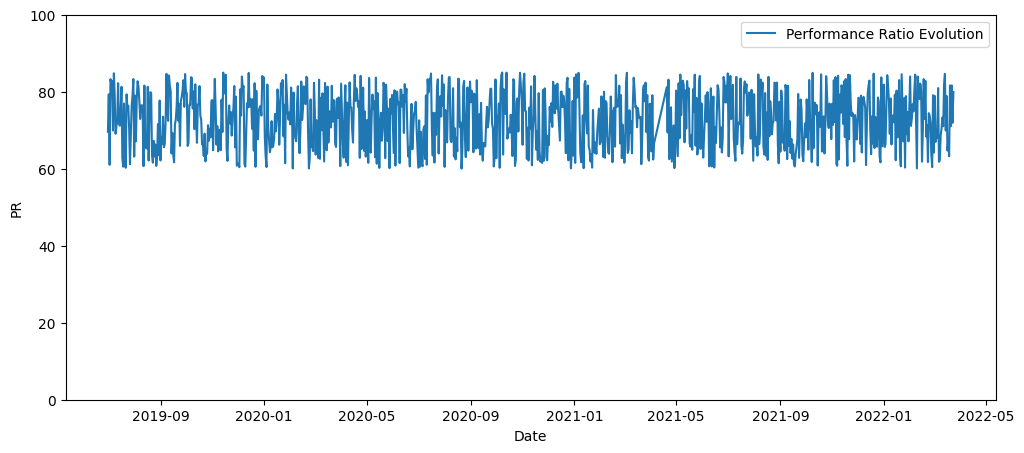

In [12]:
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_ylim(0, 100)
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'PR',
             data = df,
             label = 'Performance Ratio Evolution')

# plt.plot(PR_data['SMA_30_days'],label='30 days moving average of PR', color='red')
plt.xlabel( 'Date')

plt.ylabel('PR')

In [13]:
df['30 day moving avg' ] = df.PR.rolling(30).mean()

Text(0, 0.5, 'Performance Ratio [%]')

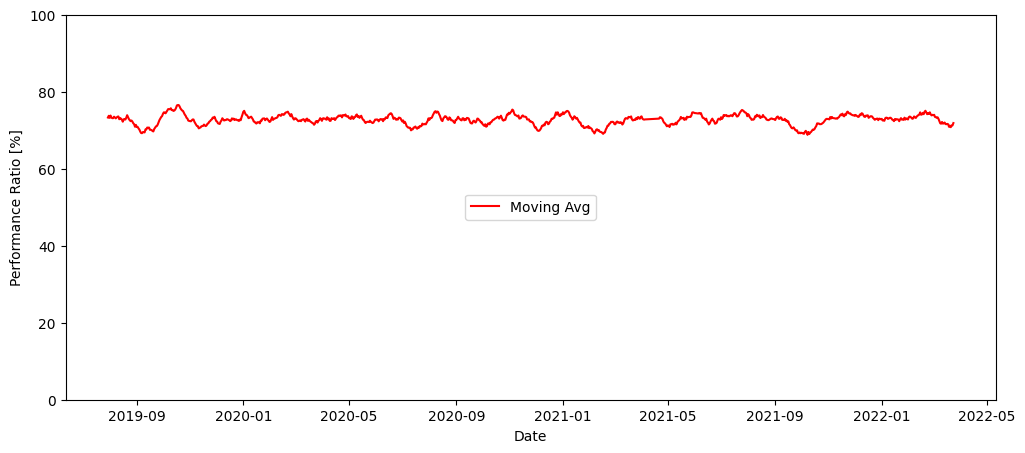

In [14]:
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_ylim(0, 100)

# plot using rolling average
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = 'Moving Avg')

plt.legend(loc='center')
plt.xlabel('Date')
plt.ylabel('Performance Ratio [%]')

In [ ]:
constant = 73.9 * 1.008

In [ ]:
df['Year'] = df['Date'].dt.strftime('%Y')
df.head()

,Date,GHI,PR,30 day moving avg,Year
0,2019-07-01,3.256608,69.575676,NaN,2019
1,2019-07-02,3.976767,79.314411,NaN,2019
2,2019-07-03,2.811867,61.020006,NaN,2019
3,2019-07-04,3.658408,83.262576,NaN,2019
4,2019-07-05,5.590683,82.124440,NaN,2019


In [ ]:
df['Target Budget Yield'] = (df['Year'] - 2018)*constant*0.992

In [ ]:
for Year in list(df['Year']):
  if Year == 2019.0:
    df['Target Budget Yield'] = 73.9
  else:
    df['Target Budget Yield'] = (73.9) * ((0.992)**(Year - 2019))

In [ ]:
print(df['Year'].dtypes)

float64


In [ ]:
df['Year'] = df['Year'].astype(float)

In [ ]:
df.head()

,Date,GHI,PR,30 day moving avg,Year
0,2019-07-01,3.256608,69.575676,NaN,2019.0
1,2019-07-02,3.976767,79.314411,NaN,2019.0
2,2019-07-03,2.811867,61.020006,NaN,2019.0
3,2019-07-04,3.658408,83.262576,NaN,2019.0
4,2019-07-05,5.590683,82.124440,NaN,2019.0


In [ ]:
df['Year']

0      2019.0
1      2019.0
2      2019.0
3      2019.0
4      2019.0
        ...  
977    2022.0
978    2022.0
979    2022.0
980    2022.0
981    2022.0
Name: Year, Length: 982, dtype: float64

In [ ]:
df['Month'] = df['Date'].dt.strftime('%m')
df.head()

,Date,GHI,PR,30 day moving avg,Year,Month
0,2019-07-01,3.256608,69.575676,NaN,2019.0,07
1,2019-07-02,3.976767,79.314411,NaN,2019.0,07
2,2019-07-03,2.811867,61.020006,NaN,2019.0,07
3,2019-07-04,3.658408,83.262576,NaN,2019.0,07
4,2019-07-05,5.590683,82.124440,NaN,2019.0,07


In [ ]:
df = df.drop('Target Budget Yield', axis=1)
df.head()

,Date,GHI,PR,30 day moving avg,Year,Month
0,2019-07-01,3.256608,69.575676,NaN,2019.0,07
1,2019-07-02,3.976767,79.314411,NaN,2019.0,07
2,2019-07-03,2.811867,61.020006,NaN,2019.0,07
3,2019-07-04,3.658408,83.262576,NaN,2019.0,07
4,2019-07-05,5.590683,82.124440,NaN,2019.0,07


In [ ]:
df['Month'] = df['Month'].astype(int)

In [ ]:
print(df['Month'].dtypes)

int64


In [ ]:
for Year, Month in zip(df['Year'], df['Month']):
  if Year == 2019:
    df['Target Budget Yield'] = 73.9
  elif Year == 2020 and Month < 7:
    df['Target Budget Yield'] = 73.9
  else:
    df['Target Budget Yield'] =

In [ ]:
import datetime
for Date, Month, Year in zip(df['Date'], df['Month'], df['Year']):
  if Date >= datetime.datetime(2019, 7, 1, 0, 0, 0) and Date < datetime.datetime(2020, 7, 1, 0, 0, 0):
    df['Target Budget Yield'] = float(73.9)
  elif Month < 7:
    df['Target Budget Yield'] = float(73.9*(0.992**(Year-2020)))
  else:
    df['Target Budget Yield'] = float(73.9*(0.992**(Year-2019)))

In [ ]:
import datetime
constant = 73.9
factor = 0.992
for i in range(len(df)):
  if df['Date'][i] >= datetime.datetime(2019, 7, 1, 0, 0, 0) and df['Date'][i] < datetime.datetime(2020, 7, 1, 0, 0, 0):
    df['Target Budget Yield'][i] = constant
  elif df['Month'][i] < 7:
    df['Target Budget Yield'][i] = constant*(factor**(df['Year']-2020))
  else:
    df['Target Budget Yield'][i] = constant*(factor**(df['Year']-2019))

In [ ]:
import datetime
constant = 73.9
factor = 0.992
for i in range(len(df)):
  if df['Date'][i] >= datetime.datetime(2019, 7, 1, 0, 0, 0) and df['Date'][i] < datetime.datetime(2020, 7, 1, 0, 0, 0):
    df['Target Budget Yield'][i] = constant
  elif df['Month'][i] < 7 :
    df['Target Budget Yield'] = constant*(factor**(df['Year']-2020))
  else:
    df['Target Budget Yield'] = constant*(factor**(df['Year']-2019))

<ipython-input-154-6d5ebd5e58c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target Budget Yield'][i] = constant


In [ ]:
df.head()

,Date,GHI,PR,30 day moving avg,Year,Month,Target Budget Yield
0,2019-07-01,3.256608,69.575676,NaN,2019.0,7,74.495968
1,2019-07-02,3.976767,79.314411,NaN,2019.0,7,74.495968
2,2019-07-03,2.811867,61.020006,NaN,2019.0,7,74.495968
3,2019-07-04,3.658408,83.262576,NaN,2019.0,7,74.495968
4,2019-07-05,5.590683,82.124440,NaN,2019.0,7,74.495968


In [ ]:
len(df)

982

In [ ]:
rslt_df = df[df['Month'] < 7]
rslt_df

,Date,GHI,PR,30 day moving avg,Year,Month,Target Budget Yield
184,2020-01-01,5.074650,83.707309,74.778182,2020.0,1,73.90000
185,2020-01-02,4.731758,68.113111,75.035274,2020.0,1,73.90000
186,2020-01-03,4.440450,63.188956,74.454717,2020.0,1,73.90000
187,2020-01-04,3.618475,60.442371,74.010166,2020.0,1,73.90000
188,2020-01-05,4.872125,81.863592,73.941078,2020.0,1,73.90000
...,...,...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,71.181262,2022.0,3,72.72233
978,2022-03-21,3.431675,71.057353,70.789540,2022.0,3,72.72233
979,2022-03-22,3.580492,81.631509,71.231840,2022.0,3,72.72233
980,2022-03-23,4.997617,71.906149,71.249772,2022.0,3,72.72233


In [ ]:
print(df['Date'].dtypes)

datetime64[ns]


In [ ]:
## datetime.datetime(2020, 5, 13, 22, 50, 55)

In [ ]:
import datetime
df['Date'][0] <= datetime.datetime(2019, 6, 2, 0, 0, 0)

False

In [ ]:
if df['Date'][0] >= datetime.datetime(2019, 7, 1, 0, 0, 0) and df['Date'][0] < datetime.datetime(2020, 7, 1, 0, 0, 0):
  print('hi')

hi


In [ ]:
if 2<3:
  print('hi')

hi


In [ ]:
print(df['Month'].dtypes)

int64


In [ ]:
print(df['Year'].dtypes)

float64


In [ ]:
date1 = pd.Series(pd.date_range('2020-7-1 12:00:00', periods = 5))
dfab = pd.DataFrame(dict(date_given = date1))

dfab['month_of_date'] = dfab['date_given'].dt.month
dfab

,date_given,month_of_date
0,2020-07-01 12:00:00,7
1,2020-07-02 12:00:00,7
2,2020-07-03 12:00:00,7
3,2020-07-04 12:00:00,7
4,2020-07-05 12:00:00,7


In [ ]:
print(dfab['month_of_date'].dtypes)

int64


In [15]:
df['Target Budget Yield'] = 0.0
for index, row in df.iterrows():
    date = row['Date']
    year, month = date.year, date.month
    if pd.Timestamp(2019, 7, 1) <= date < pd.Timestamp(2020, 7, 1):
        df.loc[index, 'Target Budget Yield'] = 73.9
    elif month < 7:
        df.loc[index, 'Target Budget Yield'] = 73.9 * (0.992 ** (year - 2020))
    else:
        df.loc[index, 'Target Budget Yield'] = 73.9 * (0.992 ** (year - 2019))

In [20]:
df.head(-1)

,Date,GHI,PR,30 day moving avg,Target Budget Yield
0,2019-07-01,3.256608,69.575676,NaN,73.90000
1,2019-07-02,3.976767,79.314411,NaN,73.90000
2,2019-07-03,2.811867,61.020006,NaN,73.90000
3,2019-07-04,3.658408,83.262576,NaN,73.90000
4,2019-07-05,5.590683,82.124440,NaN,73.90000
...,...,...,...,...,...
976,2022-03-19,5.915042,63.243977,70.891286,72.72233
977,2022-03-20,4.226183,81.632738,71.181262,72.72233
978,2022-03-21,3.431675,71.057353,70.789540,72.72233
979,2022-03-22,3.580492,81.631509,71.231840,72.72233


In [ ]:
rslt_df = df[df['Date'].year == 2021]
rslt_df

Text(0, 0.5, 'PR')

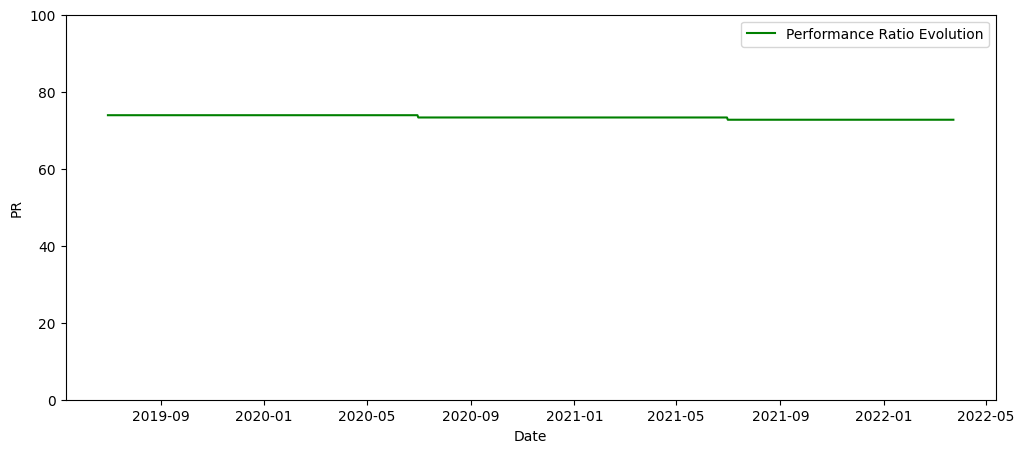

In [21]:
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_ylim(0, 100)
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Performance Ratio Evolution')

# plt.plot(PR_data['SMA_30_days'],label='30 days moving average of PR', color='red')
plt.xlabel( 'Date')

plt.ylabel('PR')

Text(0, 0.5, 'Performance Ratio [%]')

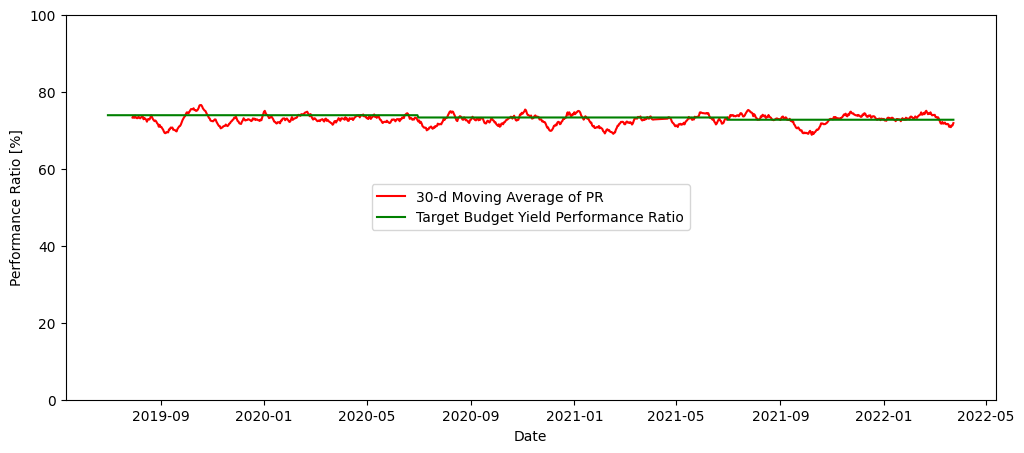

In [22]:
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_ylim(0, 100)

# plot using rolling average
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')


plt.legend(loc='center')
plt.xlabel( 'Date')
plt.ylabel('Performance Ratio [%]')

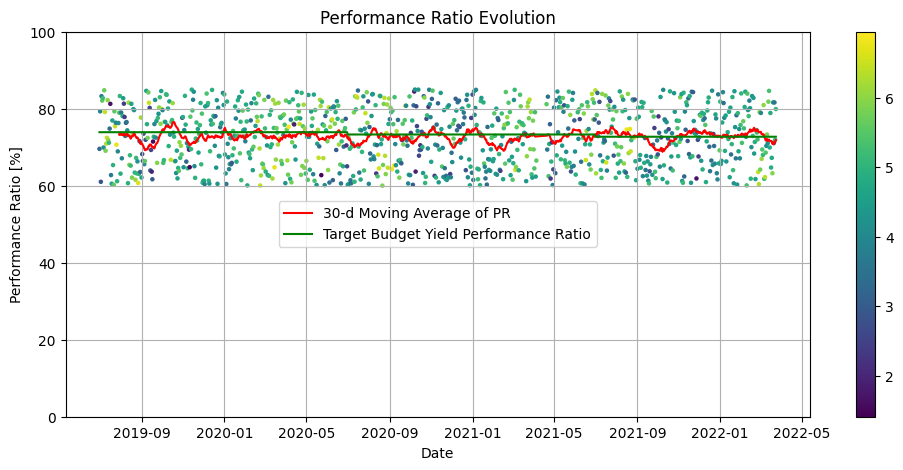

In [23]:
x = np.array(df['Date'])
y = np.array(df['PR'])

plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_title("Performance Ratio Evolution")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

plt.grid()
plt.colorbar()
plt.legend(loc='center')

In [ ]:
len(df[df['PR'] > df['Target Budget Yield']])

478

In [ ]:
len(df)

982

In [ ]:
num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)
print(f'Points above Target Budget PR = {num}/{den} = {ans}%')

Points above Target Budget PR = 478/982 = 48.68%


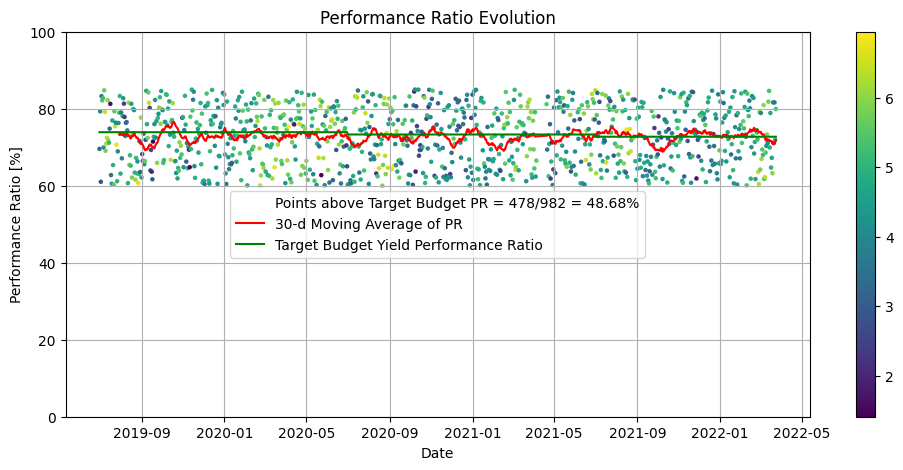

In [24]:
x = np.array(df['Date'])
y = np.array(df['PR'])

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_title("Performance Ratio Evolution")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')
# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

plt.grid()
plt.colorbar()
plt.legend(loc='center')

In [ ]:
print(df['Date'].dtypes)

datetime64[ns]


In [ ]:
# data['Order_Date'] = data['Shipment ID'].str[:8]

In [ ]:
df['Date'].iloc[-1].str[:10]

In [ ]:
start_date = str(df['Date'].iloc[0].ctime())
print(start_date)

Mon Jul  1 00:00:00 2019


In [ ]:
start_date[4:10] + start_date[19:]

'Jul  1 2019'

In [ ]:
df['Date'].iloc[-1]

Timestamp('2022-03-24 00:00:00')

In [25]:
start_date_time = str(df['Date'].iloc[0].ctime())
end_date_time = str(df['Date'].iloc[-1].ctime())

start_date = start_date_time[4:10] + start_date_time[19:]
end_date = end_date_time[4:10] + end_date_time[19:]

print(start_date)
print(end_date)

Jul  1 2019
Mar 24 2022


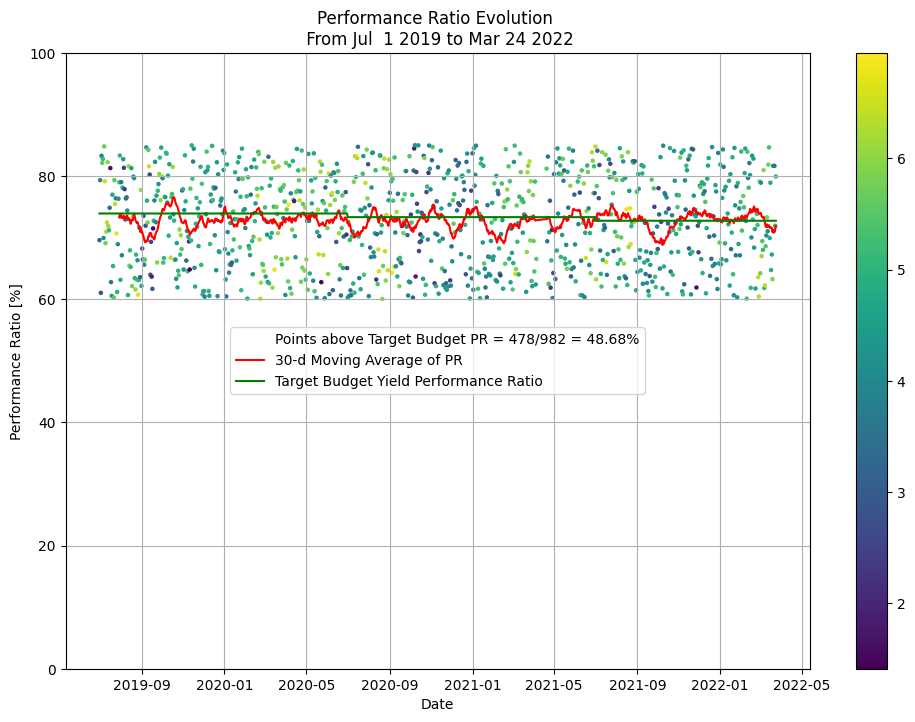

In [26]:
x = np.array(df['Date'])
y = np.array(df['PR'])

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')
# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

plt.grid()
plt.colorbar()
plt.legend(loc='center')

In [ ]:
df['PR'].tail(7).sum()/7

73.80366172428572

In [27]:
# Average PR of last 7-d
avg_7 = round(df['PR'].tail(7).sum()/7,2)
print(avg_7)

# Average PR of last 30-d
avg_30 = round(df['PR'].tail(30).sum()/30,2)
print(avg_30)

# Average PR of last 60-d
avg_60 = round(df['PR'].tail(60).sum()/60,2)
print(avg_60)

# Average PR of last 90-d
avg_90 = round(df['PR'].tail(90).sum()/90,2)
print(avg_90)

# Average PR of last 365-d
avg_365 = round(df['PR'].tail(365).sum()/365,2)
print(avg_365)

# Average PR of lifetime
avg_life = round(df['PR'].sum()/len(df),2)
print(avg_life)

73.8
71.86
73.01
73.05
72.88
72.73


In [28]:
textstr = f'Average PR of last 7-d = {avg_7}\n Average PR of last 30-d = {avg_30}\n Average PR of last 60-d = {avg_60}\n Average PR of last 90-d = {avg_90}\n Average PR of last 365-d = {avg_365}\n Average PR of lifetime = {avg_life}'

In [29]:
from matplotlib.offsetbox import AnchoredText

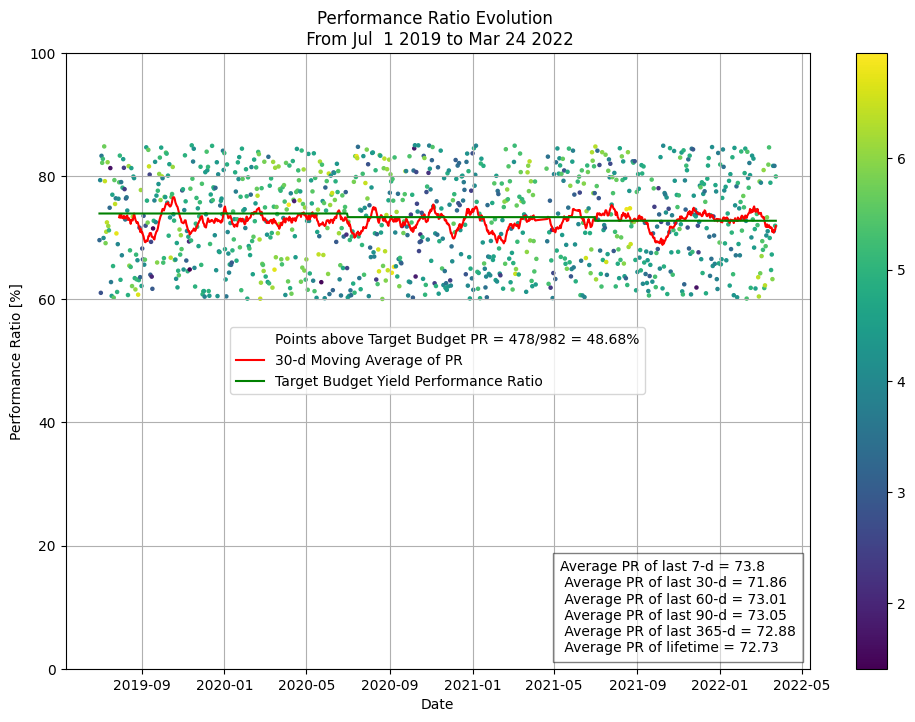

In [30]:
x = np.array(df['Date'])
y = np.array(df['PR'])

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')
# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()
plt.colorbar()
plt.legend(loc='center')

In [ ]:
df['colour'] = 0
for index, row in df.iterrows():
    GHI = row['GHI']
    if GHI < 2:
        df.loc[index, 'colour'] = 0
    elif 2 <= GHI < 4:
        df.loc[index, 'colour'] = 1
    elif 4 <= GHI < 6:
        df.loc[index, 'colour'] = 2
    else:
        df.loc[index, 'colour'] = 3

In [ ]:
df.head(20)

In [31]:
x = np.array(df['Date'])
y = np.array(df['PR'])
colours = np.array(df['colour'])
colormap = np.array(['cyan', 'dodgerblue', 'orangered','brown'])

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = colormap[colours], s = 5)

plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')
# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'darkgreen',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()
plt.legend(loc='center')

KeyError: ignored

In [ ]:
df.head(10)

,Date,GHI,PR,30 day moving avg,Target Budget Yield,Year,Month,colour
0,2019-07-01,3.256608,69.575676,NaN,73.9,2019.0,7,1
1,2019-07-02,3.976767,79.314411,NaN,73.9,2019.0,7,1
2,2019-07-03,2.811867,61.020006,NaN,73.9,2019.0,7,1
3,2019-07-04,3.658408,83.262576,NaN,73.9,2019.0,7,1
4,2019-07-05,5.590683,82.124440,NaN,73.9,2019.0,7,2
5,2019-07-06,5.179733,82.764172,NaN,73.9,2019.0,7,2
6,2019-07-07,4.120733,69.924507,NaN,73.9,2019.0,7,2
7,2019-07-08,5.707992,84.789151,NaN,73.9,2019.0,7,2
8,2019-07-09,6.469825,79.152393,NaN,73.9,2019.0,7,3
9,2019-07-10,5.811892,69.085899,NaN,73.9,2019.0,7,2


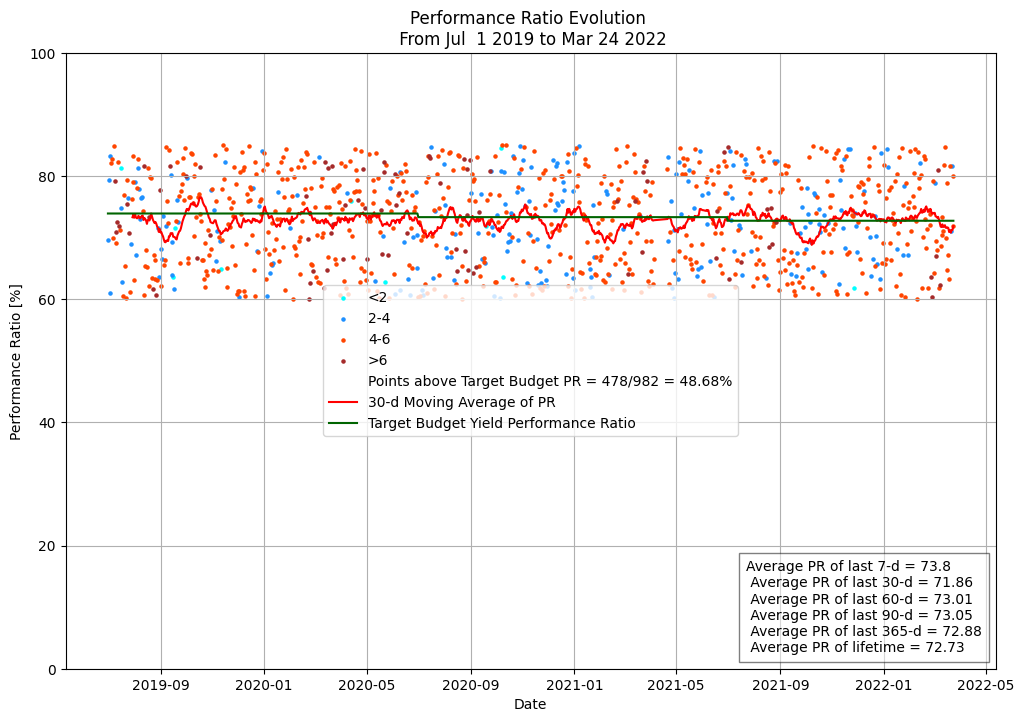

In [32]:
x = np.array(df['Date'])
y = np.array(df['PR'])
# colours = np.array(df['colour'])
# colormap = np.array(['cyan', 'dodgerblue', 'orangered','brown'])
# colour_names = ['<2', '2-4', '4-6', '>6']

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(data=df[df.GHI < 2], x='Date', y='PR', c = 'cyan' , s = 5, label='<2')
plt.scatter(data=df[(df.GHI >= 2) & (df.GHI < 4)], x='Date', y='PR', c = 'dodgerblue' , s = 5, label='2-4')
plt.scatter(data=df[(df.GHI >= 4) & (df.GHI < 6)], x='Date', y='PR', c = 'orangered' , s = 5, label='4-6')
plt.scatter(data=df[df.GHI > 6], x='Date', y='PR', c = 'brown' , s = 5, label='>6')

# Empty legend line specifying a calulated metric
plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')

# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'darkgreen',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()
plt.legend(loc='center')

In [ ]:
line1, = plt.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = plt.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='upper right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc='lower right')

plt.show()

In [ ]:
## BELOW IS THE CODE THAT WAS UPLOADED ON STACK OVERFLOW.

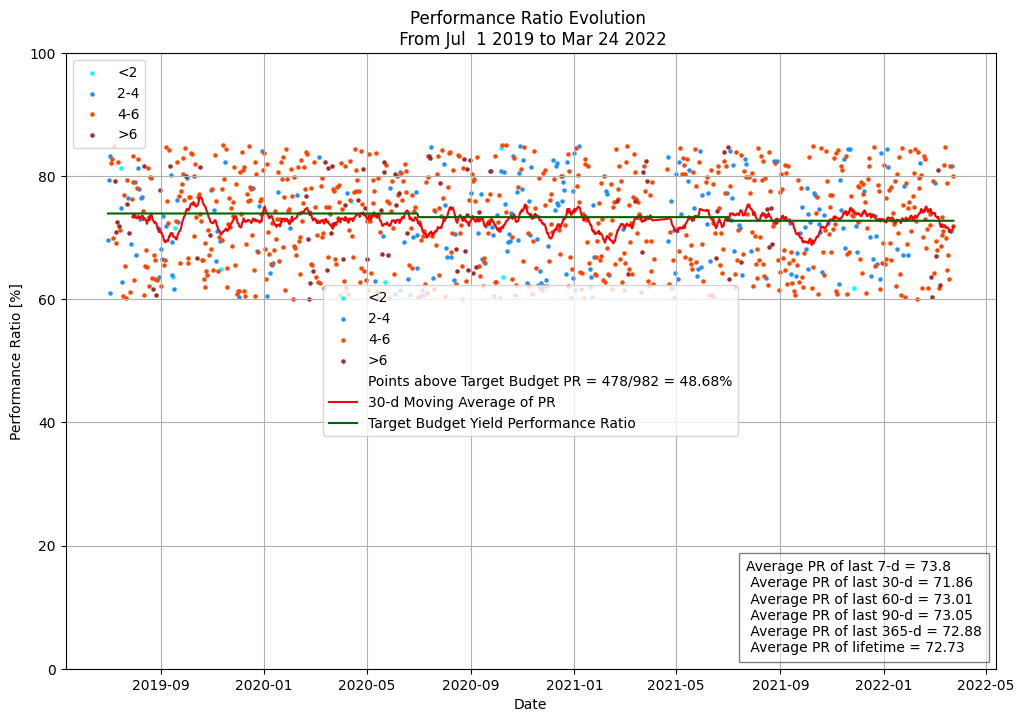

In [33]:
x = np.array(df['Date'])
y = np.array(df['PR'])
# colours = np.array(df['colour'])
# colormap = np.array(['cyan', 'dodgerblue', 'orangered','brown'])
# colour_names = ['<2', '2-4', '4-6', '>6']

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
scatter1 = plt.scatter(data=df[df.GHI < 2], x='Date', y='PR', c = 'cyan' , s = 5, label='<2')
scatter2 = plt.scatter(data=df[(df.GHI >= 2) & (df.GHI < 4)], x='Date', y='PR', c = 'dodgerblue' , s = 5, label='2-4')
scatter3 = plt.scatter(data=df[(df.GHI >= 4) & (df.GHI < 6)], x='Date', y='PR', c = 'orangered' , s = 5, label='4-6')
scatter4 = plt.scatter(data=df[df.GHI > 6], x='Date', y='PR', c = 'brown' , s = 5, label='>6')

PATBPR, = plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')
# plot using rolling average
# using seaborn.lineplot()
TDMAPR = sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
TBYPR = sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'darkgreen',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()

legend1 = plt.legend((scatter1,scatter2,scatter3,scatter4),['<2','2-4','4-6','>6'], loc = 'upper left')
plt.gca().add_artist(legend1)

plt.legend(loc = 'center')

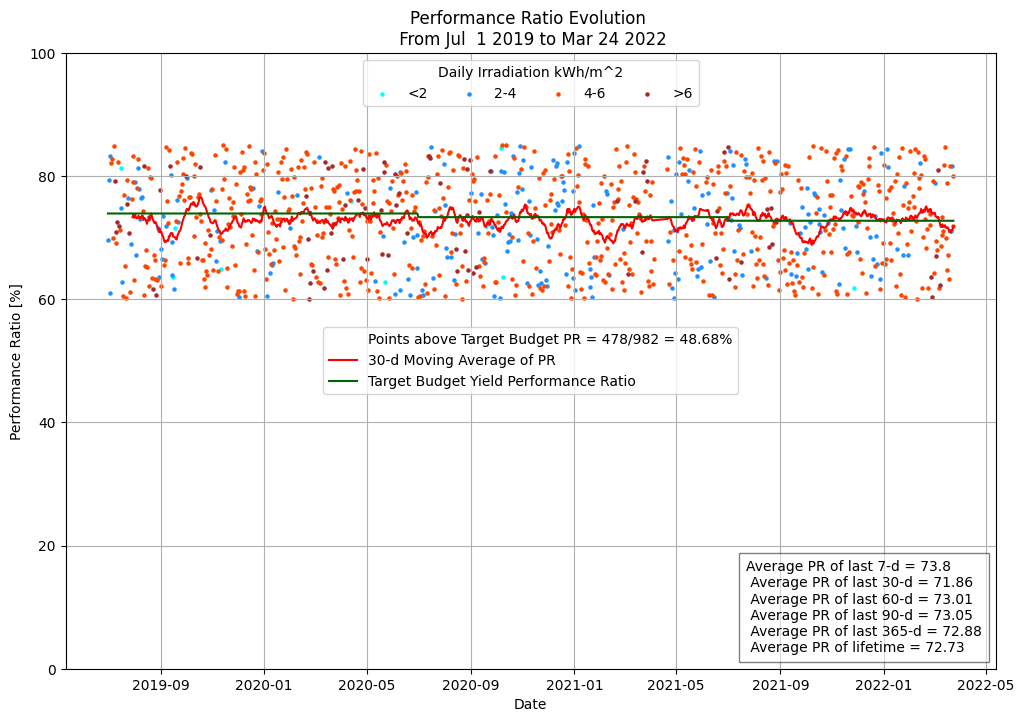

In [36]:
x = np.array(df['Date'])
y = np.array(df['PR'])
# colours = np.array(df['colour'])
# colormap = np.array(['cyan', 'dodgerblue', 'orangered','brown'])
# colour_names = ['<2', '2-4', '4-6', '>6']

num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
scatter1 = plt.scatter(data=df[df.GHI < 2], x='Date', y='PR', c = 'cyan' , s = 5, label='<2')
scatter2 = plt.scatter(data=df[(df.GHI >= 2) & (df.GHI < 4)], x='Date', y='PR', c = 'dodgerblue' , s = 5, label='2-4')
scatter3 = plt.scatter(data=df[(df.GHI >= 4) & (df.GHI < 6)], x='Date', y='PR', c = 'orangered' , s = 5, label='4-6')
scatter4 = plt.scatter(data=df[df.GHI > 6], x='Date', y='PR', c = 'brown' , s = 5, label='>6')

plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')
# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'darkgreen',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()

h,l = plt.gca().get_legend_handles_labels() ##Get the legend handles and lables

l1 = plt.gca().legend(h[4:],l[4:], loc='center') ##Plot the seborn lines as the first legend
l2 = plt.gca().legend(h[:4],l[:4], loc='upper center', title='Daily Irradiation kWh/m^2', ncol = 4) ##Plot the seborn lines as the first legend

plt.gca().add_artist(l1) # 2nd legend will erases the first, so need to add it
plt.show()